In [19]:
import os
from random import *
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sys import getsizeof

In [32]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [33]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [3]:
fashion_ds=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

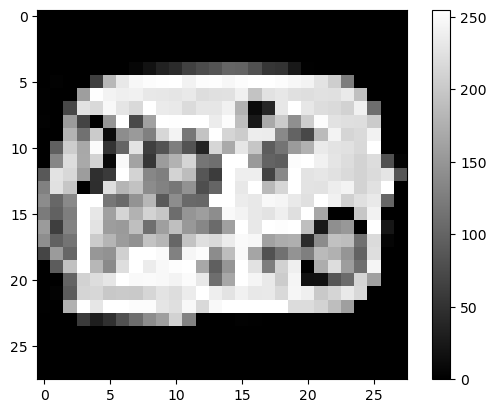

In [25]:
plt.figure()
r=randint(0, 60000)
plt.imshow(train_images[r], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [27]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2804 - accuracy: 0.8961
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2707 - accuracy: 0.9006
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9045
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9086
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2383 - accuracy: 0.9105
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2305 - accuracy: 0.9141
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2245 - accuracy: 0.9157
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2155 - accuracy: 0.9189
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2101 - accuracy: 0.9209
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.203

In [34]:
keras_model_name = "tf_model_fashion_mnist.h5"

In [35]:
model.save(keras_model_name)

In [36]:
convert_bytes(get_file_size(keras_model_name), "MB")

File size: 1.189 Megabytes


In [37]:
keras_model_size = get_file_size(keras_model_name)

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy is {}%'.format(round(100*test_acc, 2)))

313/313 - 1s - loss: 0.3338 - accuracy: 0.8850 - 671ms/epoch - 2ms/step

Test accuracy is 88.5%


In [39]:
tflite_model_name = "tf_lite_model.tflite"

In [40]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Laptop\AppData\Local\Temp\tmp6ba67cuy\assets


INFO:tensorflow:Assets written to: C:\Users\Laptop\AppData\Local\Temp\tmp6ba67cuy\assets


In [41]:
open(tflite_model_name, "wb").write(tflite_model)

408864

In [42]:
convert_bytes(get_file_size(tflite_model_name), "KB")

File size: 399.281 Kilobytes


In [43]:
tflite_file_size = get_file_size(tflite_model_name)

In [45]:
interpreter = tf.lite.Interpreter(model_path = tflite_model_name)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


In [46]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [47]:
test_images.dtype

dtype('float64')

In [49]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [50]:
test_imgs_numpy.dtype

dtype('float32')

In [51]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [55]:
acc = accuracy_score(prediction_classes, test_labels)
acc

0.885

In [53]:
print('Test accuracy TFLITE model is {}%'.format(round(100*acc, 2)))

Test accuracy TFLITE model is 88.5%


In [54]:
tflite_file_size/keras_model_size

0.3278633838416238